# Kernels
Los kernels son herramientas que nos ayudan a generalizar los SVMs a problemas que no sean linealmente separables.

Vamos a estudiar los kernels comenzando con dos ejemplos simples.



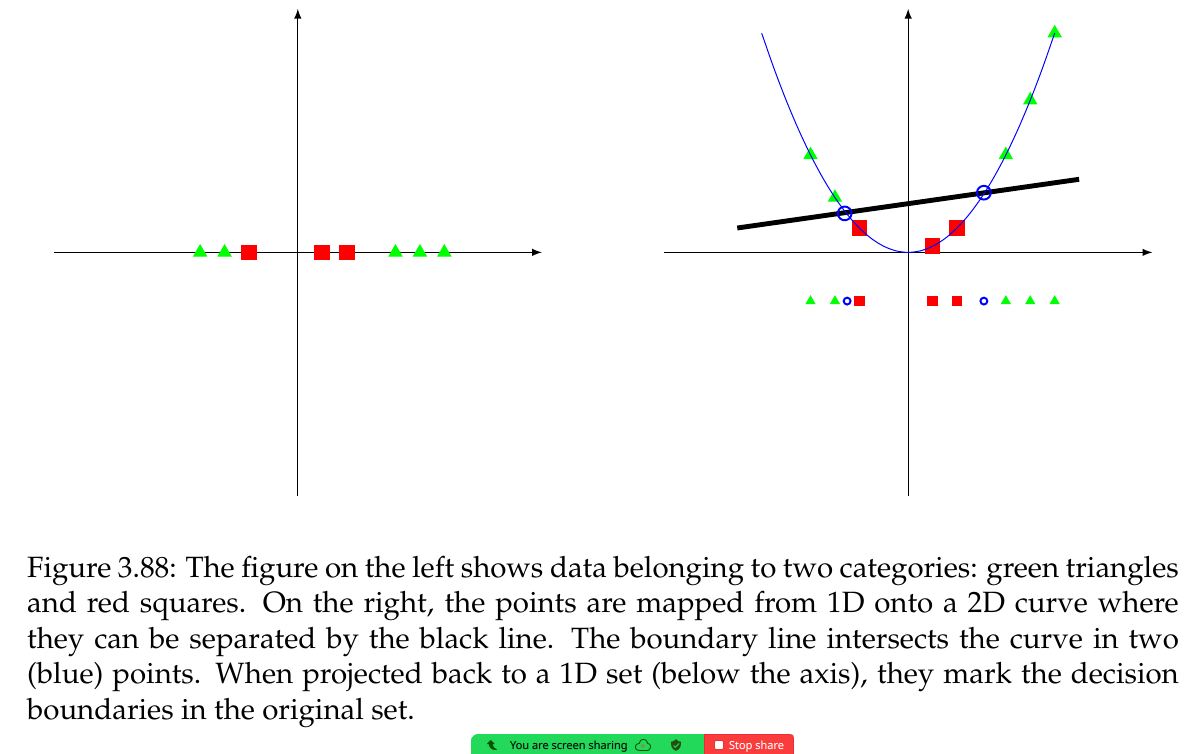

La Figura 3.88 muestra dos grupos de objetos (cuadrados rojos, triangulos verdes). No son linealmente separables. Es decir, no existe una linea vertical (en 1D, o punto) que separe a los dos conjuntos.

El oficio del kernel es levantar los puntos a 2 dimensiones.
Los puntos originales son $x^{(i)}, i=1, 2, \cdots m$.
Vamos a levantar los puntos sobre una parabola $y=x^2$, de forma que ahora los puntos estan el plano $\mathbb{R}^2$ y ahora son

$$\{ (x^{(1)}, (x^{(1)})^2), \cdots, (x^{(m)}, (x^{(m)})^2) \} $$

La parte derecha de la Figura 3.88 muestra este caso.
Se observa que en 2D estos puntos son linealmente separables por una linea obliqua (la linea negra).

El siguiente paso es hallar los interptos del hiperplano separador (la linea negra) con la parabola. Estos puntos son los puntos azules en la grafica.

El paso final es proyectar hacia abajo (backproject) los puntos azules y se muestra (debajo del eje $x$) el resultado de la separacion con dos puntos azules entre triangulos verdes y cuadrados rojos.

Que pasaria si los puntos estan todos a un lado del eje $y$ (a la derecha del eje $y$). Observemos la Figura 3.89

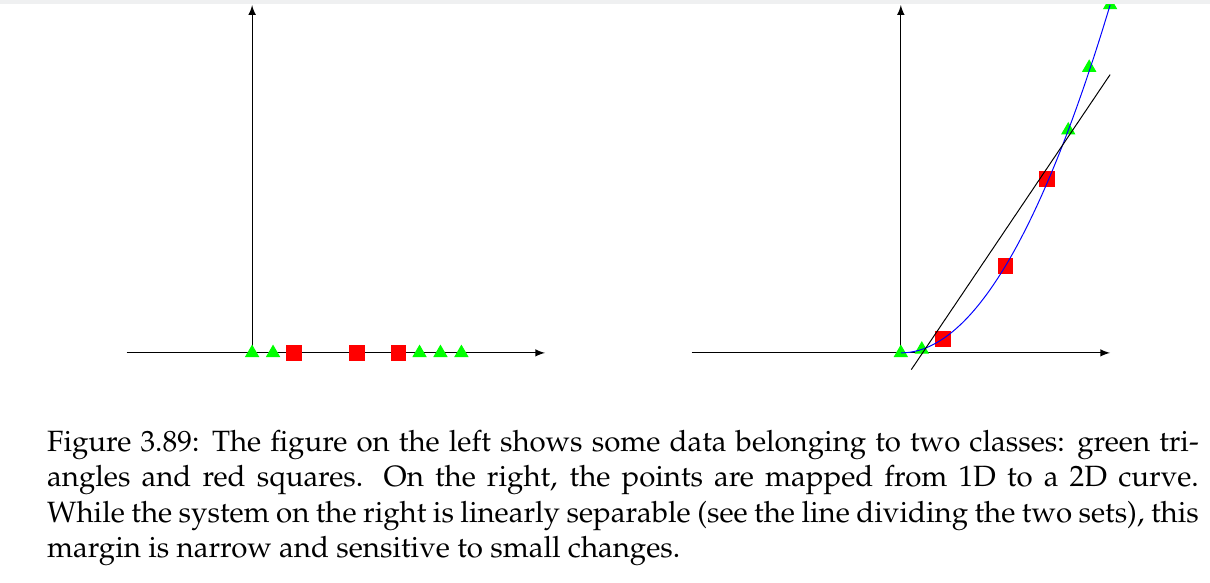

El proceso se puede repetir aca. Se back-project (hacia $\mathbb{R}^2$ desde $\mathbb{R}$, los puntos sobre una parabola, de la misma forma. Aun asi se observa que los puntos son **linealmente separables** en el plano. Sin embargo la linea es muy delgada. El "gap" es muy pequenho.

La solucion para este problema es **normalizar** los datos por la media. Es decir restarle a los datos la media. Cada dato
$x^{(i)}$, ahora sera llamado $x^{(i)} - \mu$, donde
$\mu = \frac1m \sum_{i=1}^m x^{(i)}$. La funcion de backprojection es ahora

$$f(x) = (x - \mu)^2 $$
Con esto todos los datos estan centrados en el origen, con datos a lado y lado del eje $y$ y el problema se reduce al anteior.

Una vez encontremos la "boundary line", esta se debe corregir, sumandole la media $\mu$.

Lista de pasos en el algoritmo
* Se normalizan  datos: se calcula la media y se le resta a cada dato.
* Se backproject de $\mathbb{R}$ a $\mathbb{R}^2$ mediante un mapeo, por ejemplo $f(x)=(x- \mu)^2$

* En el nuevo dominion en $\mathbb{R}^2$ los objetos son **linealmente separables**. Se aplica el SVM como lo estudiamos en la clase anterior.  Hoy hacemos un analisis mas detallado del algoritmo.

* Se halla la interseccion del hiperplano separador (la linea negra) con la superficie (curva).

* Se proyecta esta interseccion a 1D.

* Le sumamos la media a la inerseccion y la mostramos con los datos originales.

Veamos otro ejemplo ya en 2D.

Tomamos un conjunto de puntos en 2D con dos clases que no son linealmente separables. Los podemos "backproject" (levantar, lift) a 3D mediante una paraboloide $f(x,y) = z= x^2 + y^2$ .
Alli (en 3D) los puntos pueden ser linealmente separables. Se encuentra el hiperplano que separa los puntos, se intersecta este con la superficie y se proyeta la interseccion a 2D.
Veamos esto en la Figura 3.90.


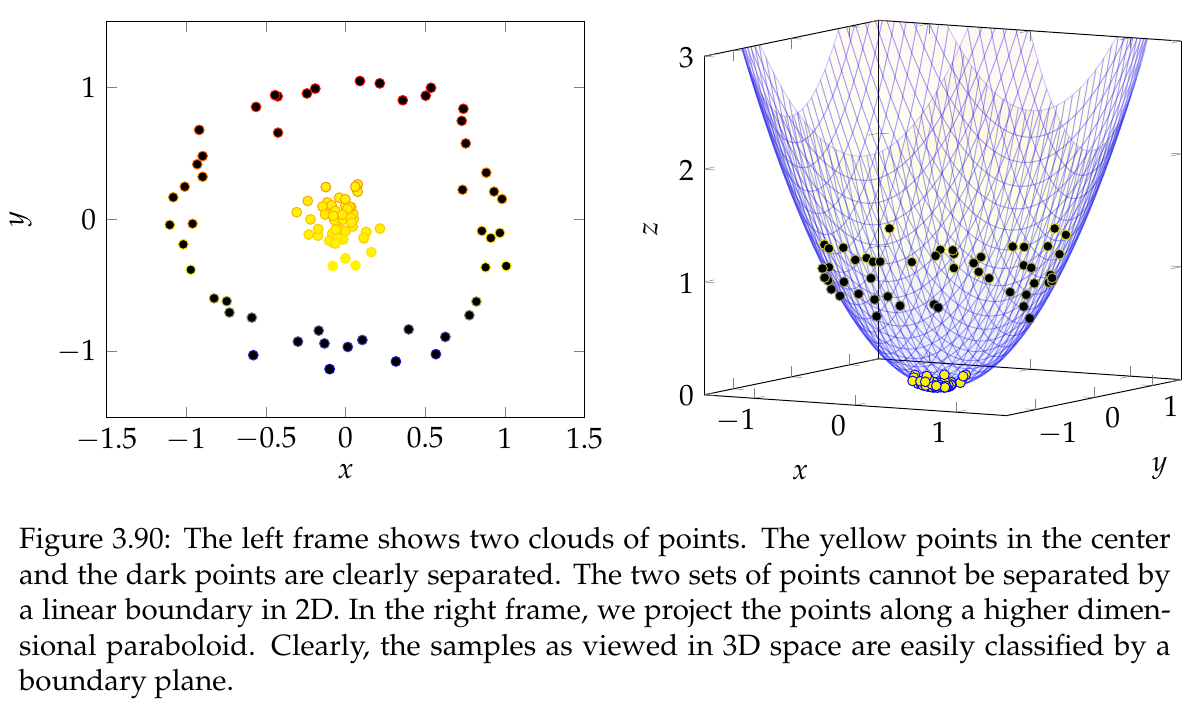

**Algoritmo general**.

1. Tenemos los puntos en un espacio $\mathbb{R}^n$.
2. Normalizamos los puntos, restandole la media.
3. Levantamos los puntos a un espacio de mayor dimension $\mathbb{R}^k$, $k > n$.
4. Se resuelve el SVM (lineal, como la clase anterior). Se encuentra el hiperplano de $k-1$ dimensiones que separa los objetos (vectores).
5. Hallamos la interseccion del hiperplano con la superficie en $\mathbb{R}^k$.
5. Proyectamos la interseccion al espacio de origen $\mathbb{R}^n$.
6. A esta proyeccion le sumamos la media. Es es el "boundary line".

En el caso de la paraboloide tenemos media en $x$, $\mu_x$, y en $y$, $\mu_y$ y la superficie para el "lifting" es

$$f(x,y) = (x - \mu_x, y - \mu_y, (x-\mu_x)^2 + (y - \mu_y)^2) $$

La siguiente figura muestra un ejemplo de esto, pero la superfice de "lifting" es Gaussiana y el algoritmo que se uso fue un algoritmo en Matlab (`svmTrain.m`) la referencia en las notas de clase.




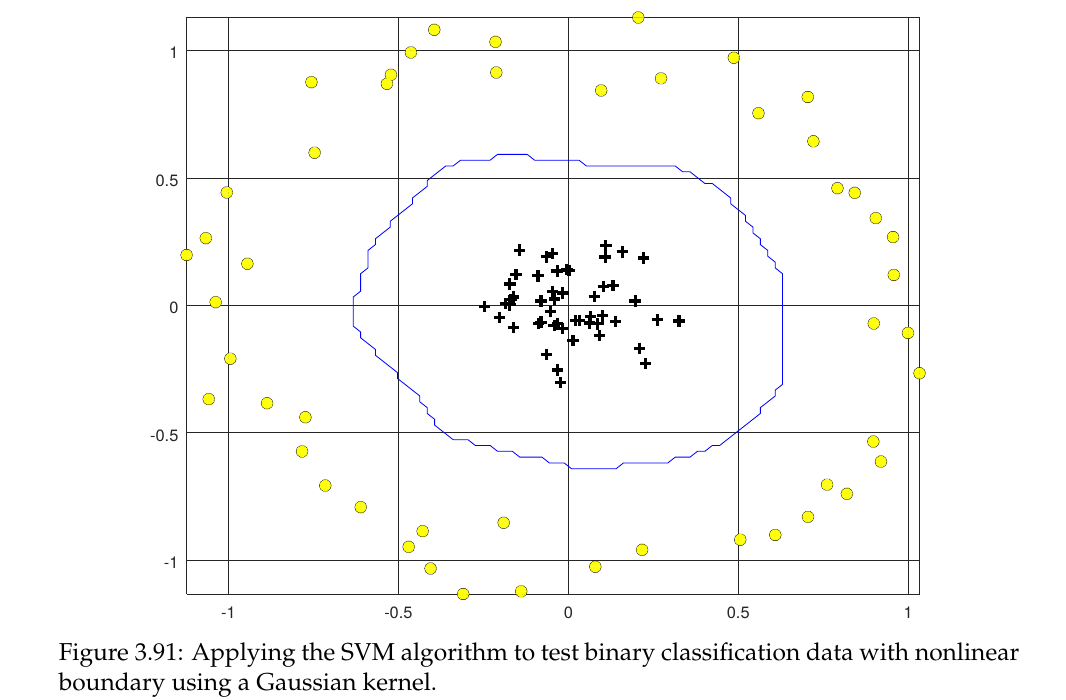

## Problema dual
Vamos a proponer un problema que se llama **el problema dual**. Esta formulacion tiene ventajas que las mencionamos al final.
La idea el problema dual es usar **multiplicadores de Lagrange**.

Recordemos la formulacion del SVM con funcion de costo con restricciones.

$$\text{minimizar   } J(w) = \frac{\| w \|^2}{2} $$
$$\text{sujeto a }  y_i(w^T x_i - b) \ge 1  \quad i=1,2, \cdots, m $$
Equivalente mente podemos decir

$$\text{minimizar   } J(w) = \frac{\| w \|^2}{2} $$
$$\text{sujeto a }  y_i(w^T x_i - b) - 1 \ge 0  \quad i=1,2, \cdots, m $$

Este es un problema de la forma

$$\min f(\theta) \quad \text{ sujeto a }  $$
$$ g_i(\theta) \ge 0 $$.
Esto es una forma de un problema general llamado el
[KKT](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions)
debido a Karush, Kuhn, and Tucker.

Nosotros lo vemos como multiplicadores de Lagrange y usamos la igualdad. El problema se resuelve definiendo la nueva funcion de costo

$$L(\theta, \lambda) = f(\theta) - \sum_i \lambda_i g_i(\theta).  $$

Los $\lambda_i$ se conocen como los **multiplicadores de Lagrange**. En nuestro caso $\lambda$ es la **variable dual**.

En nuestro caso la funcion de costo se transforma en

$$L(w, b, \lambda) = \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i( w \cdot x_i - b) - 1] .  \tag{0} $$
Como se optimiza este problema? El metodo consiste en
* hallar el gradiente,
* igualarlo a 0.
La solucion seria el minimo.

Veamos:
$$\nabla_w L(w, b, \lambda) = \nabla_w \left [  \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i( w \cdot x_i - b) - 1] \right ] = 0.  $$

Omitimos los indices en las sumas para simplificar.

Vamos a tomar el caso del primer termino.

$$\frac{\partial}{\partial w_j} \left ( \frac12 \| w \|^2 \right )= \frac{\partial}{\partial w_j} \left ( \frac12 \sum_i w_i^2  \right ) = \sum_i \delta_{ij} w_i = w_j \tag{1}.
$$

Vamos ahora a ver la contribucion, al gradiente, del  segundo termino dentro del corchete.

\begin{eqnarray}
\frac{\partial }{\partial w_j}
\left (
    \sum_i \lambda_i [ y_i ( w \cdot x_i - b) -1 ]
    \right )
    &=& \frac{\partial }{\partial w_j}
    \left (
        \sum_i \lambda_i
        \left [
            y_i \left (
                \sum_k w_k(x_i)_k - b)
                \right )
                -1
            \right ]
        \right )
        \\
        &=&  \sum_i \lambda_i \left [
            y_i \left ( \sum \delta_{kj} (x_i)_k
                \right )
            \right ]  \\
            &=& \sum_i \lambda_i y_i (x_i)_j
            \tag{2}
\end{eqnarray}



Juntando la (1) con la (2) tenemos queo
$$\nabla_w L(w, b, \lambda) = w_j - \sum_i \lambda_i y_i(x_i)_j = 0 $$

Es decir

de forma vectorial
$$w = \sum_i \lambda_i y_i x_i \tag{3} $$

Hallemos el gradiente (derivada parcial) con respecto a $b$.

$$-\frac{\partial}{\partial b} \left (
    \sum_i \lambda_i [ y_i(w \cdot x - b) - 1]
    \right )
    =  \sum_i \lambda_i y_i $$

De aca que tenemos

$$ \sum_{i=1}^m \lambda_i y_i = 0 \tag{4} $$

Vamos a insertar los resultados (3) y (4) en la ecuacion (0) con el fin de eliminar $w, b$ y presentar un problema solo en $\lambda$ (la variable dual.

\begin{eqnarray}
L(\lambda) &=& \frac12 \left ( \sum_i \lambda_i y_i x_i   \right ) \cdot \left ( \sum_j \lambda_j y_j x_j  \right )
- \sum_i \lambda_i  \left[
    y_i \left( \sum_j \lambda_j y_j x_j \cdot x_i -b
        \right )  -1
    \right ] \\
    &=& \frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j - \sum_i \sum_j \lambda_i y_i \lambda_j y_j x_j \cdot x_i  + b \sum_i \lambda_i y_i  + \sum_i \lambda_i \\
    &=& -\frac12 \sum_i \sum_j \lambda_i y_i \lambda_j y_j x_i \cdot x_j + \sum_i \lambda_i
\end{eqnarray}
pues $b \sum_i \lambda_i y_i = 0$.

Entonces el **problema dual** es:
Minimizar

$$L(\lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda  \tag{5} $$
Sujeto a (de (4))

$$\sum_i \lambda_i y_i = 0 $$
Las ventajas de esta formulacion las vemos en un momento.
Una forma alternativa es usar la condicion de gradiente igual a 0 para el parametro $\lambda$

$$\frac{\partial L}{\partial \lambda} = 0 \quad , \quad i=1,2, \cdots, m. \tag{6} $$

Con esto, la ecuacion (5) es lineal en $\lambda$.

Ventajas de la formulacion dual.

1. En la siguiente seccion explicamos el **kernel trick** que hace que el trabajo con la ecuacion (5) sea muchisimo mas optimo.

2. La solucion para los $\lambda_i$ es "sparse" , solo intervienen los $\lambda_i \ne 0$ que estan en la en el margen. Los vectores de soporte

3. El sistema (5) es convexo y se ajusta a la programacion cuadratica (QP) con restricciones.

4. Si el espacio de parametros es de dimension muy alta
$n \gg m$ (por ejemplo en texto o datos "genomic") entonces
este metodo es mejor por que aca el numero de incognitas es $m$.
Mientras en la formulacion original el numero de incognitas es $n$.

5. La ecuaion (6) es **lineal** en $\lambda_i$. El problema es un problema lineal.


8:02

Que pasa una vez tengamos $\lambda$. De la Ecuacion (3) podemos calcular $w$? Que nos falta? $b$.
Como se hallar $b$? tarea.

## Kernel Trick.
SVM no era muy popular hasta que en 1991 aparecio el **kernel trick** publicado por Isabelle Guyon.

Observamos varias cosas. La ecuacion de restriccion esta dada por

$$ y_i(w^T x_i - b) \ge 1  \quad i=1,2, \cdots, m $$
Usando la Ecuacion (3)

$$ y_i \left (\sum_j \lambda_j y_j x_j \cdot x_i - b \right ) \ge 1  \quad i=1,2, \cdots, m $$
Vemos productos punto del tipo $x_i \cdot x_j$.

Ademas la Ecuacion dual  (5)

$$L(\lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda   $$
tambien presenta muchos terminos con el producto punto $x_i \cdot x_j$.

Si nosotros queremos resolver un problema que no sea linealmente separable debemos usar un kenel, llamelo $\Phi=\Phi(x_i)$.

Si quisieramos resolver un problema que nos sea linealmente separable usando la formulacion dual, debemos entonces calcular lo siguiente

$$L(\lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j \Phi(x_i) \cdot \Phi(x_j) + \sum_i \lambda   $$

con
$$ y_i \left (\sum_j \lambda_j y_j x_j \cdot x_i - b \right ) \ge 1  \quad i=1,2, \cdots, m $$

Como $y_i = \pm 1

$$ \left (\sum_j \lambda_j y_j \Phi(x_j) \cdot \Phi(x_i) - b \right ) \ge 1  \quad i=1,2, \cdots, m  \quad , \quad y_i = 1$$

$$ \left (\sum_j \lambda_j y_j \Phi(x_j) \cdot \Phi(x_i) - b \right ) < -1  \quad i=1,2, \cdots, m  \quad , \quad y_i = -1$$

Se observa que por todas partes se ven productos de la forma
$\Phi(x_i) \cdot \Phi(x_j)$ y estos son muy costosos.

* La evaluacion de $\Phi(x_i)$ puede ser costosa.
* Toca evaluar, por cada punto $\Phi(x_i)$
* Tomar los productos punto.

Vamos a ver lo que Isabelle Guyon introdujo y que hoy se conoce como el Kernel trick.

La idea es encontrar una funcion $k$ (Kernel trick) tal que

$$k(x_i, x_j) = \Phi(x_i) \cdot \Phi(x_j).  $$

Existen muchos $k$s para muchos problemas. En esta parte de la clase veremos algunos ejemplos.
A la funcion $\Phi = \Phi(x)$ se llamara un **feature map**.

**Ejemplo 3.3.8**:
* Considere $n=2$ (los "features" en 2 dimensiones). Defina


\begin{eqnarray}
\Phi : \mathbb{R}^2 &\to& \mathbb{R}^3 \\
(x_1, x_2) &\mapsto& \Phi(x_1, x_2) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2)
\end{eqnarray}

El kernel trick para esto esta definido como

$$k(x,y) = (x \cdot y)^2 $$
Vamos a ver que, en efecto $k(x,y) = \Phi(x) \cdot \Phi(y)$.
La ganancia de este truco la vemos luego.

Tome $x=(x_1, x_2)$, $y = (y_1, y_2)$
$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^2 x_i y_i  \right )^2  = x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2. $$

Comparamos

$$\Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2) \cdot (y_1^2 , y_2^2, \sqrt{2} y_1 y_2) =  x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2 $$

Se prueba entonces que $k(x,y) = \Phi(x) \cdot \Phi(y)$.

Donde esta la ventaja?

Contemos operaciones

* Para el kernel $k$
    * 2 multiplicaciones, 1 suma , 1 cuadrado.

* Para el feature map dot product.
    * 4 cuadrados
    * 4 multiplicaciones por cada $\Phi$
    * 2 multiplicaciones y 2 sumas por el producto punto.

* $n=3$.
Considere el problema


\begin{eqnarray}
\Phi : \mathbb{R}^3 &\to& \mathbb{R}^6 \\
(x_1, x_2, x_3) &\mapsto& \Phi(x_1, x_2, x_3) = (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3)
\end{eqnarray}

De otro lado el "kernel trick" es $k(x,y) = (x \cdot y)^2$.

Veamos que en verdad $k(x,y) = \Phi(x) \cdot \Phi(y)$






$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^3 x_i y_i   \right )^2 = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j$$

De otro lado


\begin{eqnarray}
\Phi(x) \cdot \Phi(y) &=&  (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3 \cdot (y_1^2, y_2^2, y_3^2, \sqrt{2} y_1 y_2, \sqrt{2} y_1 y_3, \sqrt{2} y_2 y_3) \\
&=&  \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j.
\end{eqnarray

Contemos operaciones:
* Para los "feature map" en ($x, y$)
    * 6 cuadrados
    * 12 productos
    * 6 productos y 5 sumas (producto punto).

* Para el kernel trick:
    * 3 productos
    * dos sumas
    * un cuadrado.

* Asumamos $c \in \mathbb{R}$

Definamos el siguiente kernel (trick)
$x,y \in \mathbb{R}^3$

\begin{eqnarray}
k(x,y) &=& (x \cdot y + c)^2 \\
&=& \left ( \sum_{i=1}^3 x_i y_i + c \right )
\left ( \sum_{i=1}^3 x_i y_i + c \right )  \\
&=& \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j + 2 c \sum_{i=1}^3 x_i y_i + c^2
\end{eqnarray}

El "feature map" que le corresponde a este "kernel trick"

\begin{eqnarray}
\Phi : \mathbb{R}^3 &\to& \mathbb{R}^{10} \\
(x_1, x_2, x_3) &\mapsto& (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3, \sqrt{2} c x_1 , \sqrt{2} c x_2 , \sqrt{2} c x_3, c).
\end{eqnarray}

Tarea (voluntaria), pruebe que

$$k(x,y) = \Phi(x) \cdot \Phi(y). $$

Una idea mas general es

* Esoja $d \in \mathbb{N}, d \ge 2$ y encuentre que si

$$k(x,y) = ( x \cdot y + c)^d \quad , \quad c \in \mathbb{R} $$
satisface la relacion

$$k(x,y) = \Phi(x) \cdot \Phi(y) \tag{7} $$
donde $\Phi(y)$ es un "feature mapping" de $\mathbb{R}^n$ a
$\mathbb{R}^p$, con

$$p = \binom{n+d}{d} $$
Otro ejericio para el estudiante es encontrar $\Phi$ tal que

$$\Phi : \mathbb{R}^n \to \mathbb{R}^p $$
satisface la Ecuacion (7).

## Kernel Gaussiano.
La idea es definir el kernel (trick) y encontrar el feature map correspondiente y compara el costo del uno contra el costo del otro.

$$ k(x_i, x_j) = \mathrm{e}^{-\frac{(x_i - x_j)^2}{2 \sigma^2} } $$

Donde

$$(x_i - x_j)^2 = \| x_i - x_j \|^2 = (x_i - x_j)^T(x_i - x_j) = \langle x_i - x_j, x_i - x_j \rangle  = (x_i -x_j) \cdot (x_i - x_j). $$

No nos queremos complicar y asuimos que $x_i, x_j \in \mathbb{R}$.

Usamos la expansion de Taylor (para $n \to \infty$).

$$\mathrm{e}^{\theta} = 1 + \theta+ \frac{\theta^2}{2!} + \cdots + \frac{\theta^n}{n!}. $$

Entonces

\begin{eqnarray}
\mathrm{e}^{-\frac{(x_i -x_j)^2}{2 \sigma^2}}
&=& \mathrm{e}^{- \frac{x_i^2 + x_j^2}{2 \sigma^2}}
\mathrm{e}^{\frac{ x_i x_j}{\sigma^2}} \\
&=& \mathrm{e}^{- \frac{x_i^2 + x_j^2}{2 \sigma^2}}
\left (
    1 + \frac{x_i x_j}{\sigma^2} + \frac{1}{2!} \left (
       \frac{x_i x_j}{\sigma^2} \right )^2  
       + \frac{1}{3!} \left (
       \frac{x_i x_j}{\sigma^2} \right )^3 +
       \cdots + \frac{1}{n!} \left (
       \frac{x_i x_j}{\sigma^2} \right )^n   
    \right )  \\
    &=& \mathrm{e}^{- \frac{x_i^2 + x_j^2}{2 \sigma^2}}
    \left ( (1) (1) + \frac{x_i}{\sigma} \frac{x_j}{\sigma}  + \frac{x_i^2}{\sqrt{2!} \sigma^2 } \frac{x_j^2}{\sqrt{2!} \sigma^2} + \frac{x_i^3}{\sqrt{3!} \sigma^3} \frac{x_j^3}{\sqrt{3!} \sigma^3} + \cdots + \frac{x_i^n}{\sqrt{n!} \sigma^n} \frac{x_j^n}{\sqrt{n!} \sigma^n}
    \right )  
\end{eqnarray}

De aca se ve que si definimos

$$\Phi(x) = \mathrm{e}^{-\frac{x^2}{2 \sigma^2}}
\left ( 1, \frac{x}{\sigma}, \frac{x^2}{\sqrt{2!} \sigma^2},
\frac{x^3}{\sqrt{3!} \sigma^3}, \cdots, \frac{x^n}{\sqrt{n!} \sigma^n}  \right )  $$

Entonces
$$k(x_i,x_j) = \Phi(x_i) \cdot \Phi(x_j) $$

Ahora bien el conteo es loco. Para obtener $\Phi(x)$ se necesitan infinitas operaciones. Mientras el calculo de $k(x_i, x_j)$ es simple.

## Propiedades de los kernels $k(x,y)$.

* Son simetricos $k(x,y) = k(y,x)$. La matriz
$$(K)_{ij} = k(x_i, x_j) $$ es simetrica.

* Dado que $K$ es simetrica, es diagonalizable. Ver Teorema 2.2.6. Es decir, existe una matriz diagonal $\Lambda$ con autovalores de $K$ y otra matriz $U$ ortogonal (cuyas  columnas son los autovectores de $K$ tal que


$$ K = U \Lambda U^T. $$
Si todos autovalores son positivos o 0 ($K$ no es negativa definida) entonces

\begin{eqnarray}
k_{ij} &=& \sum_{\ell}^m u_{i \ell} \lambda_\ell u_{j \ell} \\
&=& \sum_{\ell=1}^m \sqrt{\lambda_\ell} u_{i \ell} \sqrt{\lambda_\ell} u_{j \ell} \\
&=& ( \sqrt{\lambda_1 } u_{i 1}, \sqrt{\lambda_2} u_{i2}, \cdots, \sqrt{\lambda_m} u_{i m})
\cdot ( \sqrt{\lambda_1 } u_{j 1}, \sqrt{\lambda_2} u_{j2}, \cdots, \sqrt{\lambda_m} u_{j m})
\end{eqnarray}

Entonces podemos definir el "feature mapping"

\begin{eqnarray}
\Phi : \mathbb{R}^n &\to \mathbb{R}^m \\
x^{(i)} &\mapsto& ( \sqrt{\lambda_1} u_{i1}, \sqrt{\lambda_2} u_{i2}, \cdots, \sqrt{\lambda_m} u_{im} )
\end{eqnarray}

Definido de esta forma

$$(K)_{ij} = k(x^{(i)}, x^{(j)}) = \Phi(x^{(i)}) \cdot \Phi(x^{(j)}). $$

La matriz $K$ tiene un nombre **Gram Matrix**.

Si la matriz es no-negativa definida existe el $\Phi$ feature mapping de arriba. De otro lado si existe el Feature mapping entonces $K$ es no negativa definida. Veamos

Sea $c \in \mathbb{R}^m$

Entonces

\begin{eqnarray}
c^T K c &=& \sum_i \sum_j c_i c_j k(x_i, x_j) = \sum_i \sum_j c_i c_j \Phi(x_i) \cdot \Phi(x_j) = \sum_i c_i \Phi(x_i) \sum_j c_j \Phi(x_j)  \\
&=& \| \sum c_i \Phi(x_i) \|^2  \ge 0.
\end{eqnarray}
O sea que $K$ es no negativa definida.

Resumen de lo visto.
Vimos distintos kernels

* **Lineal**
$$k(x,y) = x \cdot y  + c $$

* **Polinomial**:
$$ k(x,y) = (x \cdot y + c)^d$$

* **Gaussiano**:
$$ k(x,y) = \mathrm{e}^{-\frac{ \| x - y \|^2}{2 \sigma^2}} $$

Con eso terminamos los metodos supervisados.

# Proxima clase: metodos no supervisados.
* Clustering
* PCA = Principal Component Analysis (Analisis de componentes principales).

